In [1]:
!date

Tue Jan  2 08:11:20 EST 2024


In [2]:
pwd

'/mmfs1/data/aglinska/BC-sim/Code'

In [3]:
import pandas
import numpy as np
import os
import ants
from matplotlib import pyplot as plt
from tqdm import tqdm

/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
temp = ants.image_read('../Misc/Atlas_brain_2mm_64iso.nii')
temp

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64, 64)
	 Spacing    : (2.8571, 3.4286, 2.8571)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [5]:
def get_J_sum_TD(s):
    sub = f'{s:04d}'
    im = ants.image_read(f'../synth-data-01/TD-sub-{sub}.nii.gz')
    tx = ants.registration(fixed=temp,moving=im,type_of_transform='SyN',outprefix='/scratch/aglinska/')
    J = ants.create_jacobian_determinant_image(domain_image=temp,tx=tx['fwdtransforms'][0])
    return abs(J.numpy()-1).sum()

In [6]:
def get_J_sum_ADHD(s):
    sub = f'{s:04d}'
    im_TD = ants.image_read(f'../synth-data-01/TD-sub-{sub}.nii.gz')
    im_ADHD = ants.image_read(f'../synth-data-01/ADHD-sub-{sub}.nii.gz')
    tx = ants.registration(fixed=im_TD,moving=im_ADHD,type_of_transform='SyN',outprefix='/scratch/aglinska/')
    J = ants.create_jacobian_determinant_image(domain_image=temp,tx=tx['fwdtransforms'][0])
    return abs(J.numpy()-1).sum()

In [7]:
Js_TD = [get_J_sum_TD(s) for s in tqdm(range(500))]
Js_TD = np.array(Js_TD)
np.save('../Misc/Js_TD.npy', Js_TD)

100%|█████████████████████████████████████████| 500/500 [29:09<00:00,  3.50s/it]


In [8]:
Js_ADHD = [get_J_sum_ADHD(s) for s in tqdm(range(500))]
Js_ADHD = np.array(Js_ADHD)
np.save('../Misc/Js_ADHD.npy', Js_ADHD)

100%|█████████████████████████████████████████| 500/500 [27:47<00:00,  3.33s/it]


In [10]:
# Average ratio between the magnitude of shared and disorder-specific deformations
(Js_TD/Js_ADHD).mean()

2.3853438

(array([ 23., 114., 104.,  82.,  64.,  47.,  36.,  18.,   6.,   6.]),
 array([1946.1068, 2527.6074, 3109.108 , 3690.6086, 4272.1094, 4853.61  ,
        5435.1104, 6016.611 , 6598.112 , 7179.6123, 7761.113 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

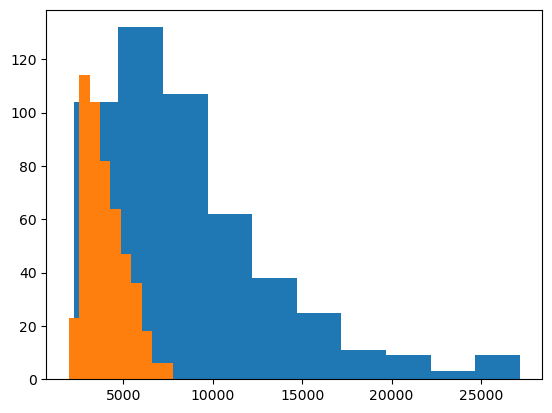

In [15]:
plt.hist(Js_TD)
plt.hist(Js_ADHD)